In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.datasets import make_classification

In [69]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

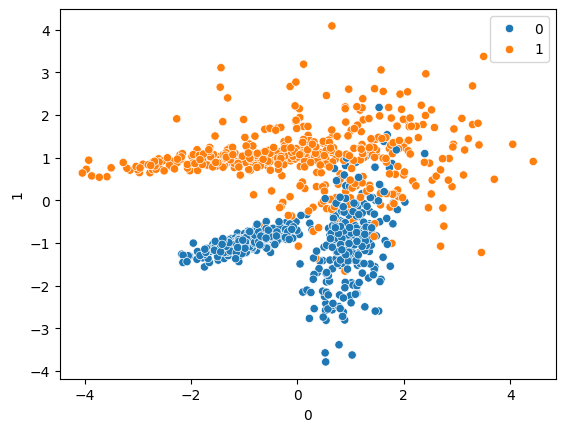

In [70]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [72]:
from sklearn.svm import SVC

In [73]:
classifier=SVC(kernel="linear")

In [74]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [75]:
classifier.coef_

array([[-0.05982453,  1.46437111]])

In [76]:
y_pred=classifier.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [78]:
print(accuracy_score(Y_test,y_pred))

0.93


In [79]:
print(confusion_matrix(Y_test,y_pred))

[[139   6]
 [ 15 140]]


In [80]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       145
           1       0.96      0.90      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# HYPER PARAMTER TUNING

In [81]:
from sklearn.model_selection import GridSearchCV


In [82]:
params={
    "C":[1,2,3,10,4,9,50],
    "gamma":[1,0.2,0.01,0.001,0.03,2,2.01],
    "kernel":["linear"]

}

In [83]:
grid=GridSearchCV(SVC(),cv=5,param_grid=params,verbose=3)

In [84]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.914 total time=   0.0s


[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.921 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.950 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.921 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.950 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.921 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 10, 4, 9, 50],
                         'gamma': [1, 0.2, 0.01, 0.001, 0.03, 2, 2.01],
                         'kernel': ['linear']},
             verbose=3)

In [85]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [86]:
y_pred=grid.predict(X_test)

In [87]:
print(accuracy_score(Y_test,y_pred))


0.93


In [88]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       145
           1       0.96      0.90      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [89]:
print(confusion_matrix(Y_test,y_pred))

[[139   6]
 [ 15 140]]
